In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
telemetry = pd.read_csv("PdM_telemetry.csv", error_bad_lines=False)
errors = pd.read_csv("PdM_errors.csv", error_bad_lines=False)
maint = pd.read_csv("PdM_maint.csv", error_bad_lines=False)
failures = pd.read_csv("PdM_failures.csv", error_bad_lines=False)
machines = pd.read_csv("PdM_machines.csv", error_bad_lines=False)

b'Skipping line 92490: expected 6 fields, saw 9\n'


In [4]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968588 entries, 0 to 968587
Data columns (total 6 columns):
datetime     968588 non-null object
machineID    968588 non-null int64
volt         968588 non-null float64
rotate       968588 non-null float64
pressure     968588 non-null float64
vibration    968588 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 44.3+ MB


In [5]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [6]:
telemetry["datetime"] = pd.to_datetime(telemetry["datetime"], format="%Y-%m-%d %H:%M:%S")
telemetry.dtypes

datetime     datetime64[ns]
machineID             int64
volt                float64
rotate              float64
pressure            float64
vibration           float64
dtype: object

In [7]:
telemetry.describe()

,machineID,volt,rotate,pressure,vibration
count,968588.000000,968588.000000,968588.000000,968588.000000,968588.000000
mean,46.230764,170.774119,446.591205,100.841515,40.383648
std,30.450409,15.507488,52.701718,11.028763,5.366198
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,18.000000,160.298184,412.278255,93.492369,36.778303
50%,45.000000,170.597611,447.555368,100.414332,40.237433
75%,73.000000,181.006196,482.154486,107.535244,43.781329
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [8]:
errors.dtypes

datetime     object
machineID     int64
errorID      object
dtype: object

In [9]:
errors["datetime"] = pd.to_datetime(errors["datetime"], format="%Y-%m-%d %H:%M:%S")
errors["errorID"] = errors["errorID"].astype("category")
errors.dtypes

datetime     datetime64[ns]
machineID             int64
errorID            category
dtype: object

In [10]:
errors.errorID.value_counts()

error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

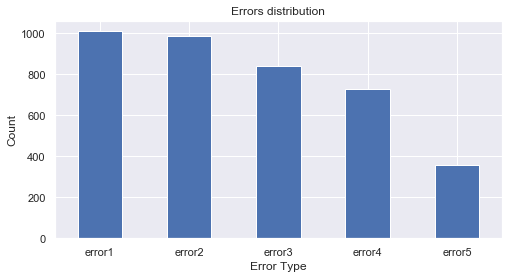

In [11]:
sns.set()
plt.figure(figsize=(8, 4))
errors["errorID"].value_counts().plot(kind="bar", rot=0)
plt.title("Errors distribution")
plt.ylabel("Count")
plt.xlabel("Error Type")
plt.show()

In [12]:
maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
datetime     3286 non-null object
machineID    3286 non-null int64
comp         3286 non-null object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [13]:
maint["datetime"] = pd.to_datetime(maint["datetime"], format="%Y-%m-%d %H:%M:%S")
maint["comp"] = maint["comp"].astype("category")
maint.dtypes

datetime     datetime64[ns]
machineID             int64
comp               category
dtype: object

In [14]:
maint.comp.value_counts()

comp2    863
comp4    811
comp3    808
comp1    804
Name: comp, dtype: int64

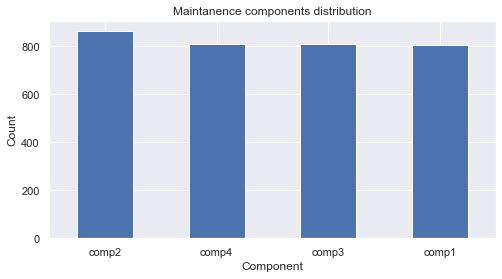

In [15]:
plt.figure(figsize=(8, 4))
maint["comp"].value_counts().plot(kind="bar", rot=0)
plt.title("Maintanence components distribution")
plt.ylabel("Count")
plt.xlabel("Component")
plt.show()

In [16]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [17]:
machines.model.value_counts()

model3    35
model4    32
model2    17
model1    16
Name: model, dtype: int64

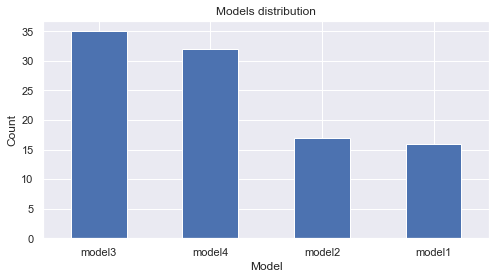

In [18]:
plt.figure(figsize=(8, 4))
machines.model.value_counts().plot(kind="bar", rot=0)
plt.title("Models distribution")
plt.ylabel("Count")
plt.xlabel("Model")
plt.show()

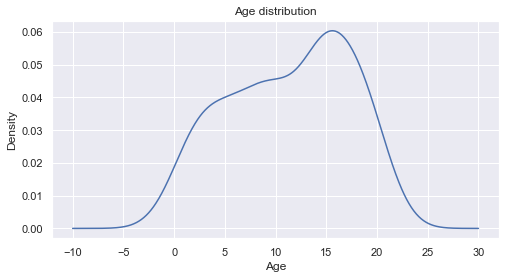

In [19]:
plt.figure(figsize=(8, 4))
machines["age"].plot(kind="kde")
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

In [20]:
machines.age.describe()

count    100.000000
mean      11.330000
std        5.856974
min        0.000000
25%        6.750000
50%       12.000000
75%       16.000000
max       20.000000
Name: age, dtype: float64

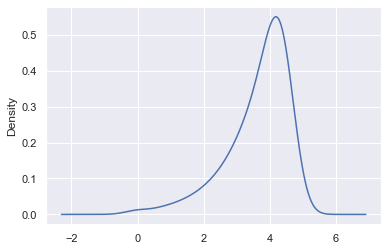

In [21]:
#нормализация логарифмом
np.log(machines[machines["age"] != 0].iloc[:, 0]).plot(kind="kde")
plt.show()

In [22]:
machines["model"] = machines["model"].astype("category")
machines.dtypes

machineID       int64
model        category
age             int64
dtype: object

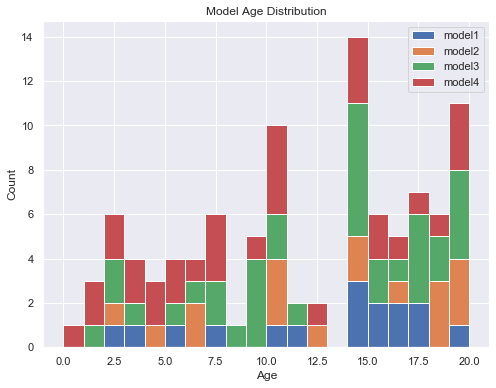

In [23]:
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([
    machines.loc[machines["model"] == "model1", "age"],
    machines.loc[machines["model"] == "model2", "age"],
    machines.loc[machines["model"] == "model3", "age"],
    machines.loc[machines["model"] == "model4", "age"]],
    20, stacked=True, label=["model1", "model2", "model3", "model4"
])
plt.title("Model Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

In [24]:
failures["datetime"] = pd.to_datetime(failures["datetime"], format="%Y-%m-%d %H:%M:%S")
failures["failure"] = failures["failure"].astype("category")
failures.dtypes

datetime     datetime64[ns]
machineID             int64
failure            category
dtype: object

In [25]:
failures.describe(include="all")

,datetime,machineID,failure
count,761,761.000000,761
unique,302,NaN,4
top,2015-01-02 03:00:00,NaN,comp2
freq,18,NaN,259
first,2015-01-02 03:00:00,NaN,NaN
last,2015-12-31 06:00:00,NaN,NaN
mean,NaN,51.911958,NaN
std,NaN,29.515542,NaN
min,NaN,1.000000,NaN
25%,NaN,24.000000,NaN


In [26]:
failures.failure.value_counts()

comp2    259
comp1    192
comp4    179
comp3    131
Name: failure, dtype: int64

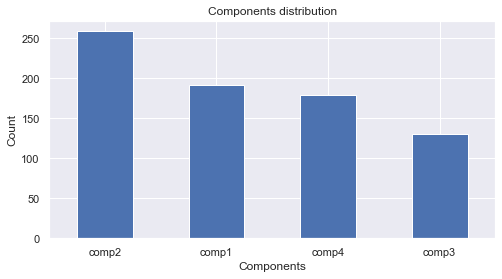

In [27]:
plt.figure(figsize=(8, 4))
failures["failure"].value_counts().plot(kind="bar", rot=0)
plt.title("Components distribution")
plt.ylabel("Count")
plt.xlabel("Components")
plt.show()

C:\Users\Timur\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Timur\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


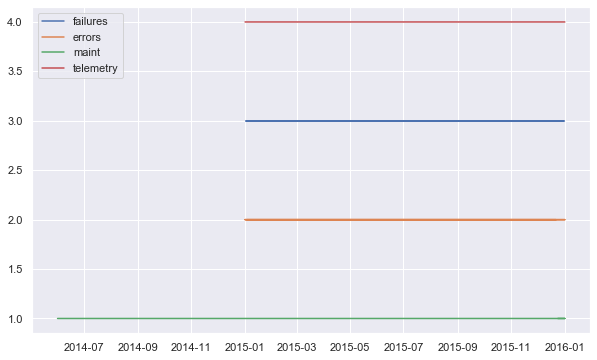

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(failures.datetime, [3]*failures.datetime.shape[0], label='failures')
plt.plot(errors.datetime, [2]*errors.datetime.shape[0], label='errors')
plt.plot(maint.datetime, [1]*maint.datetime.shape[0], label='maint')
plt.plot(telemetry.datetime, [4]*telemetry.datetime.shape[0], label='telemetry')
plt.legend()

In [29]:
telemetry.tail()

,datetime,machineID,volt,rotate,pressure,vibration
968583,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
968584,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
968585,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
968586,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259
968587,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245


# Feature engineering 

## Telemetry

### Среднее за 3 часа

In [30]:
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").mean().unstack()
    for col in fields
]
temp[1].head()

machineID  datetime           
1          2015-01-01 09:00:00    449.533798
           2015-01-01 12:00:00    403.949857
           2015-01-01 15:00:00    435.781707
           2015-01-01 18:00:00    430.472823
           2015-01-01 21:00:00    437.111120
dtype: float64

In [31]:
telemetry_mean_3h = pd.concat(temp, axis=1) 
telemetry_mean_3h.columns = [col + "mean_3h" for col in fields]
telemetry_mean_3h.reset_index(inplace=True) 
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


### Отклонение за 3 часа

In [32]:
temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").std().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00     6.721032
           2015-01-01 12:00:00     7.596570
           2015-01-01 15:00:00    10.124584
           2015-01-01 18:00:00     4.673269
           2015-01-01 21:00:00    14.752132
dtype: float64

In [33]:
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + "sd_3h" for i in fields]
telemetry_sd_3h.reset_index(inplace=True)
telemetry_sd_3h.head()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,14.752132,47.048609,4.244158,2.207884


### Среднее за 24 часа 

In [34]:
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).mean().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
dtype: float64

In [35]:
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + "mean_24h" for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h["voltmean_24h"].isnull()]
telemetry_mean_24h.head()

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214


###  Отклонение за 24 часа

In [36]:
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).std().resample("3H", closed="left", label="right").first().unstack(level=-1)
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
dtype: float64

In [37]:
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + "sd_24h" for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h["voltsd_24h"].isnull()]

In [38]:
telemetry_sd_24h.head(10)

,machineID,datetime,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,13.954518,43.490234,8.061653,5.898069
12,1,2015-01-02 21:00:00,14.402740,42.626186,10.408012,5.941890
13,1,2015-01-03 00:00:00,15.513819,40.395881,10.833294,5.737671
14,1,2015-01-03 03:00:00,15.726970,39.648116,11.904700,5.601191
15,1,2015-01-03 06:00:00,15.635083,41.828592,11.326412,5.583521
16,1,2015-01-03 09:00:00,13.995465,40.843882,11.036546,5.561553


### Telemetry_feat

In [39]:
telemetry_feat = pd.concat([
    telemetry_mean_3h,
    telemetry_sd_3h.iloc[:, 2:6],
    telemetry_mean_24h.iloc[:, 2:6],
    telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


In [40]:
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783


## Errors

In [41]:
error_count = pd.get_dummies(errors) 
error_count.columns = ["datetime", "machineID", "error1", "error2", "error3", "error4", "error5"]
error_count.head(15)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
5,2015-01-25 15:00:00,1,0,0,0,1,0
6,2015-01-27 04:00:00,1,1,0,0,0,0
7,2015-03-03 22:00:00,1,0,1,0,0,0
8,2015-03-05 06:00:00,1,1,0,0,0,0
9,2015-03-20 18:00:00,1,1,0,0,0,0


In [42]:
error_count_grouped = error_count.groupby(["machineID", "datetime"]).sum().reset_index()
error_count_grouped.head(15)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


In [43]:
error_count_filtered = telemetry[["datetime", "machineID"]].merge(
    error_count_grouped,
    on=["machineID", "datetime"],
    how="left"
).fillna(0.0)

error_count_filtered.head()

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,0.0,0.0,0.0,0.0,0.0


In [44]:
error_count_filtered.describe()

,machineID,error1,error2,error3,error4,error5
count,968588.000000,968588.000000,968588.000000,968588.000000,968588.000000,968588.000000
mean,46.230764,0.001147,0.001128,0.000958,0.000813,0.000392
std,30.450409,0.033848,0.033573,0.030938,0.028493,0.019803
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
temp = []
fields = [
    "error%d" % i
    for i in range(1,6)
]

temp = [
    pd.pivot_table(
        error_count_filtered,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).sum().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head(10)

machineID  datetime           
1          2015-01-01 09:00:00    NaN
           2015-01-01 12:00:00    NaN
           2015-01-01 15:00:00    NaN
           2015-01-01 18:00:00    NaN
           2015-01-01 21:00:00    NaN
           2015-01-02 00:00:00    NaN
           2015-01-02 03:00:00    NaN
           2015-01-02 06:00:00    0.0
           2015-01-02 09:00:00    0.0
           2015-01-02 12:00:00    0.0
dtype: float64

In [46]:
error_count_total = pd.concat(temp, axis=1)
error_count_total.columns = [i + "count" for i in fields]
error_count_total.reset_index(inplace=True)
error_count_total = error_count_total.dropna()
error_count_total.head()


,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [47]:
error_count_total["error5count"].unique()

array([0., 1., 2.])

In [48]:
error_count_total.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


## Maintenance

In [49]:
maint.head(50)

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
5,2015-01-05 06:00:00,1,comp1
6,2015-01-20 06:00:00,1,comp3
7,2015-01-20 06:00:00,1,comp1
8,2015-02-04 06:00:00,1,comp4
9,2015-02-04 06:00:00,1,comp3


In [50]:
comp_rep = pd.get_dummies(maint)
comp_rep.columns = ["datetime", "machineID", "comp1", "comp2", "comp3", "comp4"]
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2014-06-01 06:00:00,1,0,1,0,0
1,2014-07-16 06:00:00,1,0,0,0,1
2,2014-07-31 06:00:00,1,0,0,1,0
3,2014-12-13 06:00:00,1,1,0,0,0
4,2015-01-05 06:00:00,1,0,0,0,1


In [51]:
comp_rep = comp_rep.groupby(["machineID", "datetime"]).sum().reset_index()
comp_rep.head()

,machineID,datetime,comp1,comp2,comp3,comp4
0,1,2014-06-01 06:00:00,0,1,0,0
1,1,2014-07-16 06:00:00,0,0,0,1
2,1,2014-07-31 06:00:00,0,0,1,0
3,1,2014-12-13 06:00:00,1,0,0,0
4,1,2015-01-05 06:00:00,1,0,0,1


In [52]:
comp_rep = telemetry[["datetime", "machineID"]].merge(
    comp_rep,
    on=["datetime", "machineID"],
    how="outer").fillna(0).sort_values(by=["machineID", "datetime"]
)
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
968588,2014-06-01 06:00:00,1,0.0,1.0,0.0,0.0
968589,2014-07-16 06:00:00,1,0.0,0.0,0.0,1.0
968590,2014-07-31 06:00:00,1,0.0,0.0,1.0,0.0
968591,2014-12-13 06:00:00,1,1.0,0.0,0.0,0.0
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0


In [53]:
components = ["comp1", "comp2", "comp3", "comp4"]
for comp in components:
    comp_rep.loc[comp_rep[comp] < 1, comp] = None 
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), "datetime"]
    comp_rep[comp] = pd.to_datetime(comp_rep[comp].fillna(method="ffill"))

comp_rep = comp_rep.loc[comp_rep["datetime"] > pd.to_datetime("2015-01-01")]
comp_rep.head(50)

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
1,2015-01-01 06:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
2,2015-01-01 07:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
3,2015-01-01 07:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
4,2015-01-01 08:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
5,2015-01-01 08:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
6,2015-01-01 09:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
7,2015-01-01 09:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
8,2015-01-01 10:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
9,2015-01-01 10:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00


In [54]:
for comp in components: comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
2,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
3,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
4,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333


In [81]:
comp_rep.tail(50)

,datetime,machineID,comp1,comp2,comp3,comp4
968538,2015-12-30 05:00:00,100,80.958333,5.958333,80.958333,50.958333
968539,2015-12-30 06:00:00,100,81.000000,6.000000,81.000000,51.000000
968540,2015-12-30 07:00:00,100,81.041667,6.041667,81.041667,51.041667
968541,2015-12-30 08:00:00,100,81.083333,6.083333,81.083333,51.083333
968542,2015-12-30 09:00:00,100,81.125000,6.125000,81.125000,51.125000
968543,2015-12-30 10:00:00,100,81.166667,6.166667,81.166667,51.166667
968544,2015-12-30 11:00:00,100,81.208333,6.208333,81.208333,51.208333
968545,2015-12-30 12:00:00,100,81.250000,6.250000,81.250000,51.250000
968546,2015-12-30 13:00:00,100,81.291667,6.291667,81.291667,51.291667
968547,2015-12-30 14:00:00,100,81.333333,6.333333,81.333333,51.333333


In [55]:
comp_rep.describe()

,machineID,comp1,comp2,comp3,comp4
count,968588.000000,968588.000000,968588.000000,968588.000000,968588.000000
mean,46.230764,54.634332,51.758970,53.299393,52.278293
std,30.450409,63.826724,60.670415,59.018920,57.948910
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,13.333333,11.875000,13.208333,12.833333
50%,45.000000,33.291667,29.333333,32.625000,31.875000
75%,73.000000,70.125000,66.041667,68.375000,68.375000
max,100.000000,491.958333,348.958333,370.958333,394.958333


## Final_feat

In [56]:
final_feat = telemetry_feat.merge(error_count_total, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(comp_rep, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(machines, on=["machineID"], how="left")
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
2,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
3,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
4,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18


322048

In [57]:
final_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322048 entries, 0 to 322047
Data columns (total 29 columns):
machineID            322048 non-null int64
datetime             322048 non-null datetime64[ns]
voltmean_3h          322048 non-null float64
rotatemean_3h        322048 non-null float64
pressuremean_3h      322048 non-null float64
vibrationmean_3h     322048 non-null float64
voltsd_3h            322048 non-null float64
rotatesd_3h          322048 non-null float64
pressuresd_3h        322048 non-null float64
vibrationsd_3h       322048 non-null float64
voltmean_24h         322048 non-null float64
rotatemean_24h       322048 non-null float64
pressuremean_24h     322048 non-null float64
vibrationmean_24h    322048 non-null float64
voltsd_24h           322048 non-null float64
rotatesd_24h         322048 non-null float64
pressuresd_24h       322048 non-null float64
vibrationsd_24h      322048 non-null float64
error1count          322048 non-null float64
error2count          322048 n

# Label Construction

In [58]:
labeled_features = final_feat.merge(failures, on=["datetime", "machineID"], how="left")
labeled_features["failure"] = labeled_features["failure"].astype(object).fillna(method="bfill", limit=7)
labeled_features["failure"] = labeled_features["failure"].fillna("none")
labeled_features["failure"] = labeled_features["failure"].astype("category")
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
2,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
3,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
4,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none


In [59]:
model_dummies = pd.get_dummies(labeled_features["model"])
labeled_features = pd.concat([labeled_features, model_dummies], axis=1)
labeled_features.drop("model", axis=1, inplace=True)

In [91]:
labeled_features.drop_duplicates(inplace = True)

# Анализ корреляции  

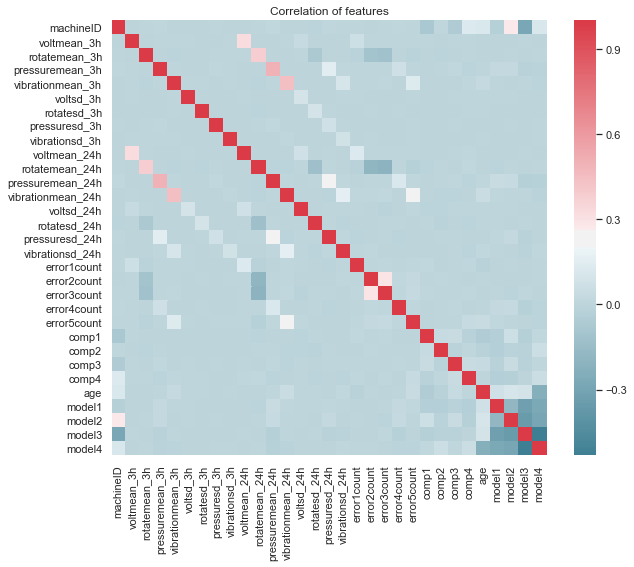

In [60]:
f, ax = plt.subplots(figsize=(10, 8))
corr = labeled_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Correlation of features")
plt.show()

# Modelling

## Training, Validation and Testing

In [61]:
threshold_dates = [
    pd.to_datetime("2015-09-30 01:00:00"), pd.to_datetime("2015-10-01 01:00:00")
]

In [62]:
test_results = []
models = []
total = len(threshold_dates)
last_train_date = threshold_dates[0]
first_test_date = threshold_dates[1]

In [63]:
ntraining = labeled_features.loc[labeled_features["datetime"] < last_train_date]
ntesting = labeled_features.loc[labeled_features["datetime"] > first_test_date]
print(f"{ntraining.shape[0]} training items.")
print(f"{ntesting.shape[0]} items in test.")
print(f"{ntesting.shape[0] / ntraining.shape[0] * 100:0.1f}% of data in test.")

240023 training items.
81189 items in test.
33.8% of data in test.


In [64]:
fails_train = ntraining[ntraining["failure"] != "none"].shape[0]
no_fails_train = ntraining[ntraining["failure"] == "none"].shape[0]
fails_test = ntesting[ntesting["failure"] != "none"].shape[0]
no_fails_test = ntesting[ntesting["failure"] == "none"].shape[0]

print(f"{fails_train / no_fails_train * 100:0.1f}% failures in train.")
print(f"{fails_test / no_fails_test * 100:0.1f}% failures in test.")

1.8% failures in train.
1.7% failures in test.


In [65]:
train_y = labeled_features.loc[labeled_features["datetime"] < last_train_date, "failure"]
train_X = labeled_features.loc[labeled_features["datetime"] < last_train_date].drop(["datetime",
                                                                                    "machineID",
                                                                                    "failure"], axis=1)
test_y = labeled_features.loc[labeled_features["datetime"] > first_test_date, "failure"]
test_X = labeled_features.loc[labeled_features["datetime"] > first_test_date].drop(["datetime",
                                                                                   "machineID",
                                                                                   "failure"], axis=1)

In [66]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [67]:
def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    #print("Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels")
    #print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(["accuracy", "precision", "recall", "F1"])
    
    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(["macro precision", "macro recall", "macro F1"])
    
    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)
    
    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(["average accuracy",
                          "micro-averaged precision/recall/F1"])
    
    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(["majority class accuracy", "majority class recall",
                          "majority class precision", "majority class F1"])
        
    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(["expected accuracy", "kappa"])
    

    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(["random guess accuracy", "random guess precision",
                          "random guess recall", "random guess F1"])
    
    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(["random weighted guess accuracy",
                          "random weighted guess precision",
                          "random weighted guess recall",
                          "random weighted guess F1"])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df

In [68]:
import time

In [69]:
import scikitplot as skplt

In [70]:
evaluation_results = []
def TrainAndEvaluate(model):
    start = time.time()
    model.fit(train_X, train_y)
    end = time.time()
    print('----Trained in', end - start, 'seconds----')
    
    test_result = pd.DataFrame(labeled_features.loc[labeled_features["datetime"] > first_test_date])
    test_result["predicted_failure"] = model.predict(test_X)
    test_results.append(test_result)
    models.append(model)
    evaluation_result = Evaluate(actual = test_result["failure"],
                             predicted = test_result["predicted_failure"],
                             labels = ["none", "comp1", "comp2", "comp3", "comp4"])
    skplt.metrics.plot_confusion_matrix(
        test_result["failure"],
        test_result["predicted_failure"],
        normalize=False,
        title="Matrix of confussion"
    )

    skplt.metrics.plot_confusion_matrix(
        test_result["failure"],
        test_result["predicted_failure"],
        normalize=True,
        title="Matrix of confussion (normalized)",
    )
    plt.show()

    evaluation_results.append(evaluation_result)
    return evaluation_result

##  LogisticRegression

In [70]:
from sklearn.linear_model import LogisticRegression

C:\Users\Timur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Timur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


----Trained in 125.88667488098145 seconds----


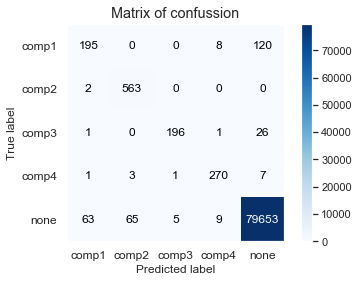

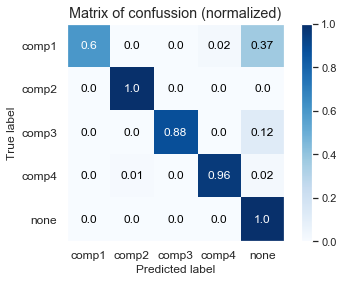

,none,comp1,comp2,comp3,comp4
accuracy,0.996157,0.996157,0.996157,0.996157,0.996157
precision,0.998083,0.744275,0.892235,0.970297,0.937500
recall,0.998220,0.603715,0.996460,0.875000,0.957447
F1,0.998152,0.666667,0.941472,0.920188,0.947368
macro precision,0.908478,0.908478,0.908478,0.908478,0.908478
macro recall,0.886169,0.886169,0.886169,0.886169,0.886169
macro F1,0.894769,0.894769,0.894769,0.894769,0.894769
average accuracy,0.998463,0.998463,0.998463,0.998463,0.998463
micro-averaged precision/recall/F1,0.996157,0.996157,0.996157,0.996157,0.996157
majority class accuracy,0.982830,0.000000,0.000000,0.000000,0.000000


In [71]:
TrainAndEvaluate(LogisticRegression(C=1))

## XGB

In [72]:
from xgboost import XGBClassifier as xgb

----Trained in 88.89599919319153 seconds----


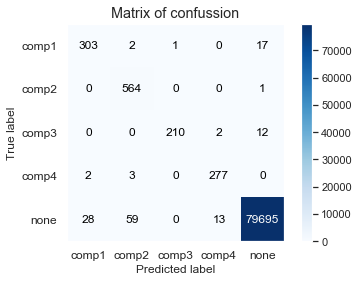

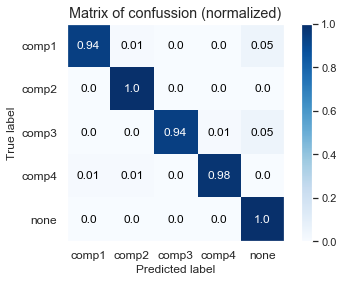

,none,comp1,comp2,comp3,comp4
accuracy,0.998276,0.998276,0.998276,0.998276,0.998276
precision,0.999624,0.909910,0.898089,0.995261,0.948630
recall,0.998747,0.938080,0.998230,0.937500,0.982270
F1,0.999185,0.923780,0.945516,0.965517,0.965157
macro precision,0.950303,0.950303,0.950303,0.950303,0.950303
macro recall,0.970965,0.970965,0.970965,0.970965,0.970965
macro F1,0.959831,0.959831,0.959831,0.959831,0.959831
average accuracy,0.999310,0.999310,0.999310,0.999310,0.999310
micro-averaged precision/recall/F1,0.998276,0.998276,0.998276,0.998276,0.998276
majority class accuracy,0.982830,0.000000,0.000000,0.000000,0.000000


In [73]:
TrainAndEvaluate(xgb(n_jobs=-1))

In [78]:
(0.999461 + 0.911043 + 0.889415 + 0.981132 + 0.954386)/5

0.9470874

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Timur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


----Trained in 3.542778491973877 seconds----


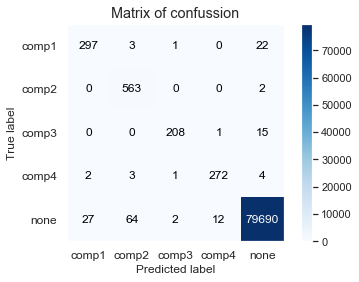

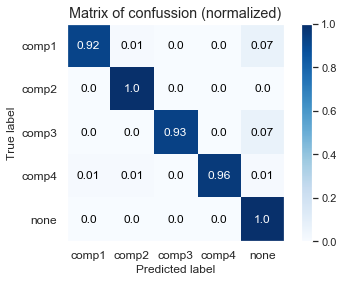

,none,comp1,comp2,comp3,comp4
accuracy,0.998042,0.998042,0.998042,0.998042,0.998042
precision,0.999461,0.911043,0.889415,0.981132,0.954386
recall,0.998684,0.919505,0.996460,0.928571,0.964539
F1,0.999072,0.915254,0.939900,0.954128,0.959436
macro precision,0.947087,0.947087,0.947087,0.947087,0.947087
macro recall,0.961552,0.961552,0.961552,0.961552,0.961552
macro F1,0.953558,0.953558,0.953558,0.953558,0.953558
average accuracy,0.999217,0.999217,0.999217,0.999217,0.999217
micro-averaged precision/recall/F1,0.998042,0.998042,0.998042,0.998042,0.998042
majority class accuracy,0.982830,0.000000,0.000000,0.000000,0.000000


In [71]:
TrainAndEvaluate(RandomForestClassifier(n_jobs=-1))

In [76]:
models

[LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints=None,
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
               objective='multi:softprob', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=None, subsample=1,
               tree_method=None, validate_parameters=False, verbosity=None),
 RandomForestClassifier(bootstrap=

In [77]:
evaluation_results[2].loc['recall']

none     0.998697
comp1    0.891641
comp2    0.992920
comp3    0.933036
comp4    0.939716
Name: recall, dtype: float64

In [78]:
evaluation_results[1].loc['recall']

none     0.998747
comp1    0.938080
comp2    0.998230
comp3    0.937500
comp4    0.982270
Name: recall, dtype: float64

In [72]:
def MakePrediction(telemetry, errors, maint, machines, model):
    print('----Reading data----')
    
    telemetry = pd.read_csv(telemetry, error_bad_lines=False)
    errors = pd.read_csv(errors, error_bad_lines=False)
    maint = pd.read_csv(maint, error_bad_lines=False)
    #failures = pd.read_csv(failures, error_bad_lines=False)
    machines = pd.read_csv(machines, error_bad_lines=False)
    
    print('----Data read succesful----')
    print('----Transforming data----')
    
    telemetry["datetime"] = pd.to_datetime(telemetry["datetime"], format="%Y-%m-%d %H:%M:%S")
    errors["datetime"] = pd.to_datetime(errors["datetime"], format="%Y-%m-%d %H:%M:%S")
    errors["errorID"] = errors["errorID"].astype("category")
    maint["datetime"] = pd.to_datetime(maint["datetime"], format="%Y-%m-%d %H:%M:%S")
    maint["comp"] = maint["comp"].astype("category")
    machines["model"] = machines["model"].astype("category")
    #failures["datetime"] = pd.to_datetime(failures["datetime"], format="%Y-%m-%d %H:%M:%S")
    #failures["failure"] = failures["failure"].astype("category")
    
    ###Feature Engineering
    
    ##telemetry
    
    temp = []
    fields = ["volt", "rotate", "pressure", "vibration"]
    
    #mean_3h
    temp = [
        pd.pivot_table(
            telemetry,
            index="datetime",
            columns="machineID",
            values=col).resample("3H", closed="left", label="right").mean().unstack()
        for col in fields
    ]
    telemetry_mean_3h = pd.concat(temp, axis=1) 
    telemetry_mean_3h.columns = [col + "mean_3h" for col in fields]
    telemetry_mean_3h.reset_index(inplace=True) 
    
    #std_3h
    temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").std().unstack()
    for col in fields
    ]
    telemetry_sd_3h = pd.concat(temp, axis=1)
    telemetry_sd_3h.columns = [i + "sd_3h" for i in fields]
    telemetry_sd_3h.reset_index(inplace=True)
    telemetry_sd_3h.head()
    
    #mean_24h
    temp = []
    fields = ["volt", "rotate", "pressure", "vibration"]

    temp = [
        pd.pivot_table(
            telemetry,
            index="datetime",
            columns="machineID",
            values=col).rolling(window=24).mean().resample("3H", closed="left", label="right").first().unstack()
        for col in fields
    ]
    telemetry_mean_24h = pd.concat(temp, axis=1)
    telemetry_mean_24h.columns = [i + "mean_24h" for i in fields]
    telemetry_mean_24h.reset_index(inplace=True)
    telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h["voltmean_24h"].isnull()]
    
    #std_24h
    temp = []
    fields = ["volt", "rotate", "pressure", "vibration"]

    temp = [
        pd.pivot_table(
            telemetry,
            index="datetime",
            columns="machineID",
            values=col).rolling(window=24).std().resample("3H", closed="left", label="right").first().unstack(level=-1)
        for col in fields
    ]
    telemetry_sd_24h = pd.concat(temp, axis=1)
    telemetry_sd_24h.columns = [i + "sd_24h" for i in fields]
    telemetry_sd_24h.reset_index(inplace=True)
    telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h["voltsd_24h"].isnull()]
    #telemetry_feat
    telemetry_feat = pd.concat([
    telemetry_mean_3h,
    telemetry_sd_3h.iloc[:, 2:6],
    telemetry_mean_24h.iloc[:, 2:6],
    telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
    
    ##errors
    error_count = pd.get_dummies(errors) 
    error_count.columns = ["datetime", "machineID", "error1", "error2", "error3", "error4", "error5"]
    error_count_grouped = error_count.groupby(["machineID", "datetime"]).sum().reset_index()
    error_count_filtered = telemetry[["datetime", "machineID"]].merge(
    error_count_grouped,
    on=["machineID", "datetime"],
    how="left"
    ).fillna(0.0)
    temp = []
    fields = [
        "error%d" % i
        for i in range(1,6)
    ]

    temp = [
        pd.pivot_table(
            error_count_filtered,
            index="datetime",
            columns="machineID",
            values=col).rolling(window=24).sum().resample("3H", closed="left", label="right").first().unstack()
        for col in fields
    ]
    error_count_total = pd.concat(temp, axis=1)
    error_count_total.columns = [i + "count" for i in fields]
    error_count_total.reset_index(inplace=True)
    error_count_total = error_count_total.dropna()
    error_count_total.head()
    
    ##maintanance
    comp_rep = pd.get_dummies(maint)
    comp_rep.columns = ["datetime", "machineID", "comp1", "comp2", "comp3", "comp4"]
    comp_rep = comp_rep.groupby(["machineID", "datetime"]).sum().reset_index()
    comp_rep = telemetry[["datetime", "machineID"]].merge(
    comp_rep,
    on=["datetime", "machineID"],
    how="outer").fillna(0).sort_values(by=["machineID", "datetime"]
    )
    components = ["comp1", "comp2", "comp3", "comp4"]
    for comp in components:
        comp_rep.loc[comp_rep[comp] < 1, comp] = None 
        comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), "datetime"]
        comp_rep[comp] = pd.to_datetime(comp_rep[comp].fillna(method="ffill"))

    comp_rep = comp_rep.loc[comp_rep["datetime"] > pd.to_datetime("2015-01-01")]
    for comp in components: comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")
    
    ##final_feat
    final_feat = telemetry_feat.merge(error_count_total, on=["datetime", "machineID"], how="left")
    final_feat = final_feat.merge(comp_rep, on=["datetime", "machineID"], how="left")
    final_feat = final_feat.merge(machines, on=["machineID"], how="left")
    model_dummies = pd.get_dummies(final_feat["model"])
    final_feat = pd.concat([final_feat, model_dummies], axis=1)
    final_feat.drop("model", axis=1, inplace=True)
    X = final_feat.drop(["datetime", "machineID"], axis=1)

    print('----Data transformation succesful----')
    print('----Making predictions----')    
    
    prediction = model.predict(X)

    print('----Data prediction succesful----')
    
    return prediction

In [74]:
predictions = MakePrediction("PdM_telemetry.csv", 'PdM_errors.csv', 'PdM_maint.csv', 'PdM_machines.csv', models[0])

----Reading data----


b'Skipping line 92490: expected 6 fields, saw 9\n'


----Data read succesful----
----Transforming data----
----Data transformation succesful----
----Making predictions----
----Data prediction succesful----


In [75]:
result = final_feat[['machineID', 'datetime']]
result['predictions'] = predictions

C:\Users\Timur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
result.head()

,machineID,datetime,predictions
0,1,2015-01-02 06:00:00,none
1,1,2015-01-02 06:00:00,none
2,1,2015-01-02 09:00:00,none
3,1,2015-01-02 09:00:00,none
4,1,2015-01-02 12:00:00,none


In [82]:
import pickle

In [87]:
filename = 'forest.pkl'
pickle.dump(models[1], open(filename, 'wb'))

In [86]:
filename = 'C:/Users/Timur/Desktop/xgb.pkl'
model = pickle.load(open(filename, 'rb'))

In [78]:
result.to_json('predictions.json')

In [115]:
result.to_csv('predictions.csv')

In [118]:
import datetime

### Количество простоев

In [206]:
suma = 0
i = 0 
while i < labeled_features[labeled_features.failure != 'none'].shape[0] - 1:
    comp = labeled_features[labeled_features.failure != 'none'].failure.iloc[i]
    j = i
    while (i < labeled_features[labeled_features.failure != 'none'].shape[0] - 1) & (labeled_features[labeled_features.failure != 'none'].failure.iloc[i] == comp):
        i += 1
    suma += labeled_features[labeled_features.failure != 'none'][['datetime']].iloc[i - 1] - labeled_features[labeled_features.failure != 'none'][['datetime']].iloc[j]
suma

datetime   770 days 12:00:00
dtype: timedelta64[ns]

In [1]:
770 / 36400

0.021153846153846155

In [72]:
prostoi = labeled_features[['datetime', 'machineID', 'failure']]
prostoi.to_csv('prostoi.csv')